Total Points = 20

10 code  blocks to be completed

Each code block is of 2 points

#Support Vector Regression using synthetic data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create a nonlinear function

In [2]:
def nonlinear(array):
    return (10*array[:,0]-np.exp(0.01*array[:,1]+np.log(1+array[:,2]**2)))/(array[:,3]**2+5)

Generate features and target data for regression

In [3]:
n_samples = 1000
n_features = 6

In [4]:
x = 6*np.random.rand(n_samples,n_features)

In [5]:
y = nonlinear(x)+np.random.randn(n_samples)

In [6]:
y=y.reshape(n_samples,1)

In [22]:
# Add code below
# read x and y arrays into a dataframe 'df_synthetic' , label the target as 'y' in the dataframe
df = pd.DataFrame(x)
df1 = pd.DataFrame(y,columns=['label'])
df_synthetic = pd.concat([df, df1],axis=1, join='outer')

In [23]:
df_synthetic

,0,1,2,3,4,5,label
0,5.596492,5.436947,1.642215,1.459151,2.917216,5.740348,8.306892
1,0.615195,5.581167,2.596268,0.410923,2.080490,4.712810,-0.961979
2,1.605573,0.485970,4.797272,1.009737,4.908033,0.504743,0.161697
3,2.353258,5.385461,4.830103,4.272010,1.381684,2.885360,-0.786555
4,2.545953,1.612873,4.780905,1.296154,4.318810,1.633679,-0.383584
...,...,...,...,...,...,...,...
995,5.619341,2.185487,1.838233,1.643258,4.130095,3.322846,9.139540
996,3.475123,1.735010,2.001148,1.036848,2.058610,5.814518,4.692400
997,5.732407,5.848823,4.941230,1.542787,0.819730,3.292122,1.990354
998,5.340019,0.636392,0.700878,0.054663,3.846171,1.734114,10.861904


Plot the data - Uncomment the following cell

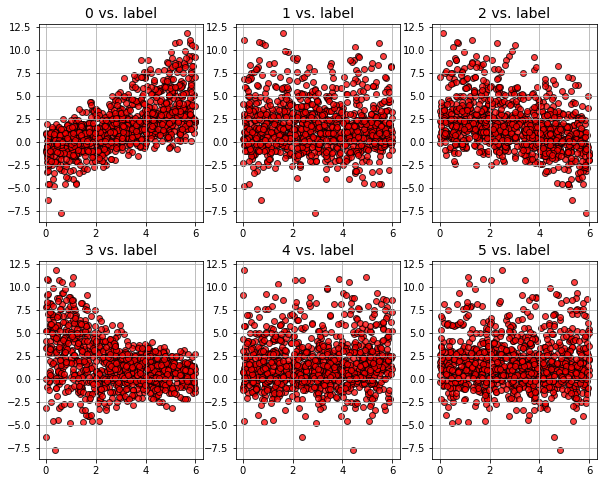

In [25]:
fig,ax = plt.subplots(2,3,figsize=(10,8))
ax = ax.ravel()
for i in range(6):
   ax[i].scatter(df_synthetic[df_synthetic.columns[i]],df_synthetic['label'],edgecolor='k',color='red',alpha=0.75)
   ax[i].set_title(f"{df_synthetic.columns[i]} vs. label",fontsize=14)
   ax[i].grid(True)
plt.show()

In [26]:
# Add code below

# Perform test train split of the dataframe 'df_synthetic'
y = df_synthetic['label']
x = df_synthetic.drop(columns = 'label')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Support vector regressor with linear kernel

In [31]:
# Add code below
# Create linear support vector regressor model and fit it on the dataset
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(X_train, y_train)

/home/sehbanfazili/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [33]:
# Add code below
# Display the R2 score
y_pred = svr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6567744761849086

In [34]:
# Add code below

# Build a linear regressor on the above dataset and report its R2 score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)
r2_score(y_test, y_pred_lr)

0.6586388921688707

Support vector regressor with RBF kernel

In [35]:
#Add code below

# Use RBF kernel with default values and perform support vector regression
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

In [36]:
# Add code below
# Report R2 score of the above model
r2_score(y_test, y_pred_rbf)

0.8056595727007279

In [48]:
# Add code below

# Perform grid search of hyperparameters - cost C and epsilon, keep gamma at 'scale' (with cross-validation) to see if the test/validation score be improved

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
hyper_params = [ {'epsilon': [1,2,3,4,5,6,7,8,9,10],'C': [5,10]}]
model = SVR(kernel="rbf",gamma = 'scale')
model_cv = GridSearchCV(estimator = model,param_grid = hyper_params,scoring= 'r2',cv = folds,verbose = 1,return_train_score=True)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVR(),
             param_grid=[{'C': [5, 10],
                          'epsilon': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
# Add code below

# Check best model by the grid search and display it
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024189,0.004995,0.004586,0.001149,5,1,"{'C': 5, 'epsilon': 1}",0.788224,0.830637,0.767663,...,0.792824,0.034985,2,0.874595,0.865566,0.879284,0.869925,0.880998,0.874074,0.005744
1,0.009486,0.001590,0.003154,0.000607,5,2,"{'C': 5, 'epsilon': 2}",0.784138,0.793674,0.755726,...,0.767961,0.036675,4,0.808766,0.811831,0.821340,0.807599,0.826895,0.815286,0.007549
2,0.003212,0.000251,0.001752,0.000082,5,3,"{'C': 5, 'epsilon': 3}",0.690265,0.763275,0.639683,...,0.701623,0.049428,6,0.736656,0.733196,0.711848,0.737979,0.752464,0.734429,0.013071
3,0.002914,0.000058,0.001654,0.000019,5,4,"{'C': 5, 'epsilon': 4}",0.514595,0.619925,0.380733,...,0.510161,0.089759,8,0.542755,0.536277,0.492333,0.569149,0.580471,0.544197,0.030637
4,0.002525,0.000064,0.001590,0.000035,5,5,"{'C': 5, 'epsilon': 5}",0.329295,0.399461,0.079434,...,0.268718,0.133029,10,0.332626,0.290619,0.232001,0.358543,0.342377,0.311233,0.045538
5,0.002434,0.000057,0.001591,0.000057,5,6,"{'C': 5, 'epsilon': 6}",0.249539,0.322344,-0.153104,...,0.175695,0.179724,11,0.262738,0.246167,0.032864,0.279930,0.282986,0.220937,0.094959
6,0.003035,0.000743,0.002011,0.000495,5,7,"{'C': 5, 'epsilon': 7}",0.176890,0.179781,-0.380839,...,0.042709,0.222729,13,0.195230,0.129323,-0.157553,0.151747,0.157361,0.095222,0.128153
7,0.003728,0.000223,0.002445,0.000077,5,8,"{'C': 5, 'epsilon': 8}",0.122611,0.139507,-0.699993,...,-0.046091,0.328984,15,0.143908,0.116484,-0.410135,0.119124,0.129405,0.019757,0.215162
8,0.002296,0.000099,0.001547,0.000022,5,9,"{'C': 5, 'epsilon': 9}",0.026527,0.060091,-0.764293,...,-0.123352,0.321575,17,0.036814,0.047737,-0.460361,0.040046,0.056103,-0.055932,0.202324
9,0.003094,0.000554,0.002253,0.000408,5,10,"{'C': 5, 'epsilon': 10}",-0.003187,-0.010671,-0.764293,...,-0.174058,0.297074,19,-0.000072,-0.021462,-0.460361,-0.030160,-0.010419,-0.104495,0.178222


In [51]:
# Add code below

# Fit that model to the data and check the R2 score
# c=10 epsilon=1
best_model = SVR(C=10,epsilon=1,kernel="rbf",gamma='scale')
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

In [52]:
r2_score(y_test, y_pred_best)

0.8148060857954607